In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [13]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
df.shape

(891, 15)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [16]:
df['who'].unique()

array(['man', 'woman', 'child'], dtype=object)

In [17]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

Step 2

In [18]:
has_servived = df['survived'] == 1
is_alived = df['alive'] == 'yes'
print((is_alived==has_servived).all())

True


In [19]:
df.drop(['alive'], axis=1, inplace=True)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,True


In [20]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alone'],
      dtype='object')

In [21]:
keep_columns = ['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'who']
df = df[keep_columns]
df.head()

,survived,pclass,age,sibsp,parch,fare,embarked,who
0,0,3,22.0,1,0,7.2500,S,man
1,1,1,38.0,1,0,71.2833,C,woman
2,1,3,26.0,0,0,7.9250,S,woman
3,1,1,35.0,1,0,53.1000,S,woman
4,0,3,35.0,0,0,8.0500,S,man


In [24]:
df['who'] = df['who'].astype('category')
df['embarked'] = df['embarked'].astype('category')

In [26]:
df.isna().sum()

survived      0
pclass        0
age         177
sibsp         0
parch         0
fare          0
embarked      2
who           0
dtype: int64

In [27]:
df.dropna(inplace=True)

In [29]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
885    False
886     True
887    False
889    False
890    False
Length: 712, dtype: bool

In [30]:
df = df[~df.duplicated()]

<Axes: ylabel='Frequency'>

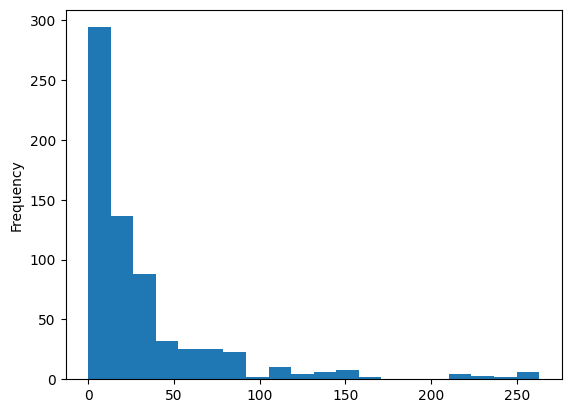

In [38]:
df['fare'][df['fare'] < 300].plot(kind='hist', bins=20)

<Axes: xlabel='who', ylabel='survived'>

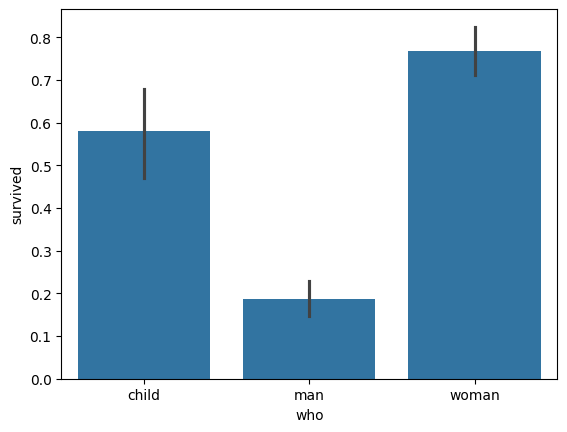

In [40]:
sns.barplot(data=df, x='who', y='survived')

In [45]:
df.head()

,survived,pclass,age,sibsp,parch,fare,embarked,who
0,0,3,22.0,1,0,7.2500,S,man
1,1,1,38.0,1,0,71.2833,C,woman
2,1,3,26.0,0,0,7.9250,S,woman
3,1,1,35.0,1,0,53.1000,S,woman
4,0,3,35.0,0,0,8.0500,S,man


In [46]:
df['embarked'].unique()

['S', 'C', 'Q']
Categories (3, object): ['C', 'Q', 'S']

In [47]:
df['embarked'] = df['embarked'].map({"S": 0, 'C': 1, 'Q': 2})
df['who'] = df['who'].map({"man": 0, 'woman': 1, 'child': 2})

C:\Users\Radin\AppData\Local\Temp\ipykernel_23868\4104380988.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['embarked'] = df['embarked'].map({"S": 0, 'C': 1, 'Q': 2})
C:\Users\Radin\AppData\Local\Temp\ipykernel_23868\4104380988.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['who'] = df['who'].map({"man": 0, 'woman': 1, 'child': 2})


<Axes: >

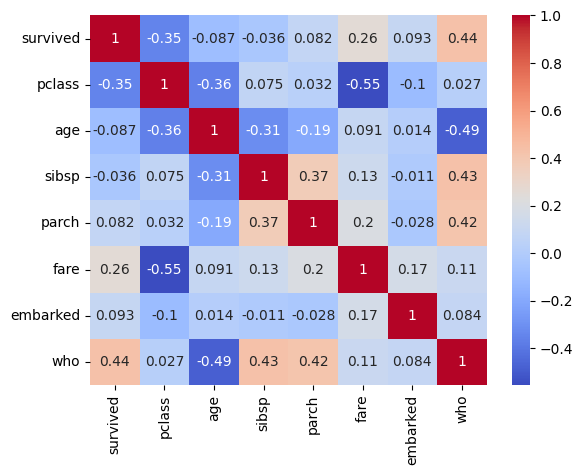

In [48]:
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', annot=True)